In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
image_size = 256
batch_size = 32
channels = 3
epochs = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\SMART\\Downloads\\PlantVillage",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size
)

Found 2152 files belonging to 3 classes.


In [4]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

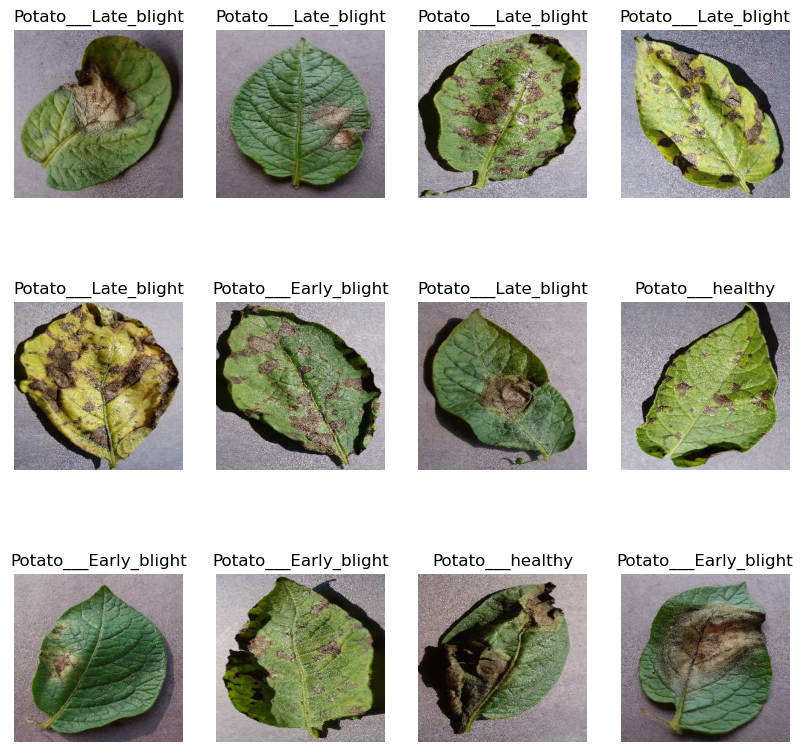

In [6]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [7]:
# spli dataset into train, test and validation 
def get_dataset_partitions_tf(ds,train_split = 0.8,test_split = 0.1, val_split = 0.1, shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    train_size = int(train_split* ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
print(len(train_ds), len(val_ds), len(test_ds))

54 6 8


In [9]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [10]:
#data scaling, resizing
resize_and_rescale = tf.keras.Sequential([
     layers.Resizing(image_size, image_size),
     layers.Rescaling(1.0/255)
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [12]:
input_shape = (batch_size, image_size, image_size, channels)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes, activation = "softmax")
])

model.build(input_shape = input_shape)

C:\Users\SMART\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [15]:
history = model.fit(train_ds,
                   epochs = epochs,
                   batch_size = batch_size,
                   verbose = 1,
                   validation_data = val_ds)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 57s 945ms/step - accuracy: 0.4445 - loss: 0.9668 - val_accuracy: 0.4531 - val_loss: 0.9434
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 639ms/step - accuracy: 0.4717 - loss: 0.9110 - val_accuracy: 0.4531 - val_loss: 0.9253
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 667ms/step - accuracy: 0.4349 - loss: 0.9094 - val_accuracy: 0.4531 - val_loss: 0.9241
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 623ms/step - accuracy: 0.4516 - loss: 0.8903 - val_accuracy: 0.4427 - val_loss: 0.9221
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 611ms/step - accuracy: 0.4710 - loss: 0.9036 - val_accuracy: 0.4635 - val_loss: 0.9218
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.4565 - loss: 0.9184 - val_accuracy: 0.4635 - val_loss: 0.9272
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.4715 - loss: 0.8880 - val_accuracy: 0.4531 - val_loss: 0.9300
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 985ms/step - accuracy: 0.4531 - loss: 0.8859 - val_accuracy:

In [16]:
score = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.5124 - loss: 0.8811


In [17]:
score

[0.89752596616745, 0.47413793206214905]

In [18]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [20]:
len(history.history["accuracy"])

10

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [22]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training & Validation Loss')

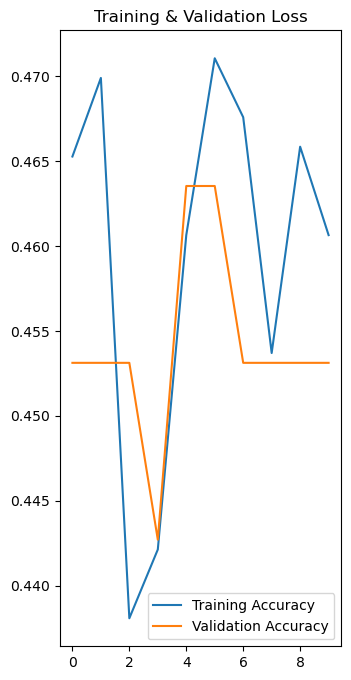

In [23]:
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc, label = "Training Accuracy")
plt.plot(range(epochs),val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training & Validation Loss")

In [26]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


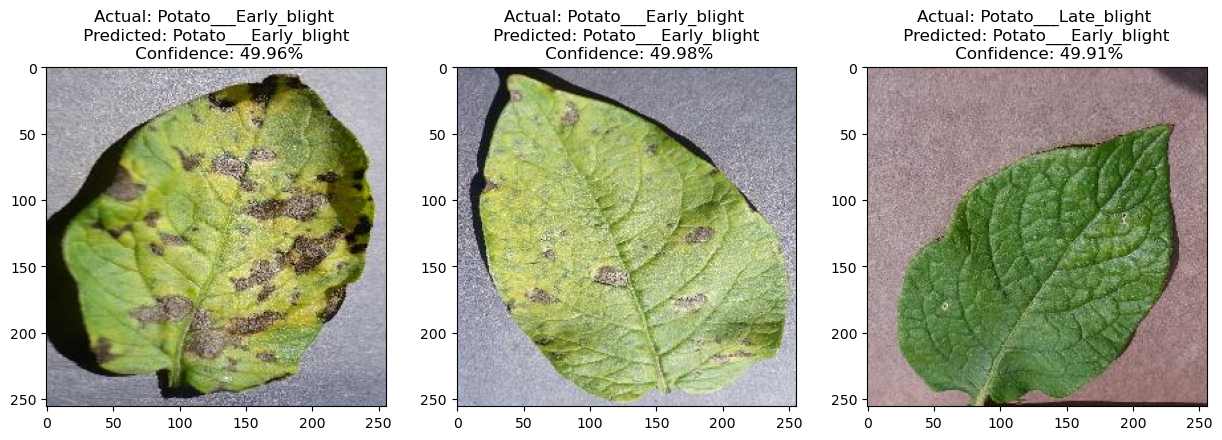

In [27]:
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(3):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Confidence: {confidence}%")
        

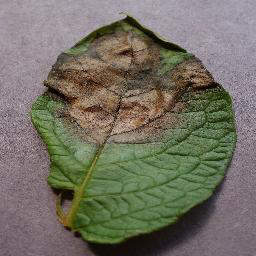

In [28]:
from PIL import Image
new_img = "C:\\Users\\SMART\\Downloads\\fe4bbe61-ddd7-464f-8aa6-e292b8686c70___RS_LB 2902.JPG"
img = Image.open(new_img)
processed_img = img.resize((256,256))
processed_img

In [29]:
def Life_Cycle(predicted_class):
    if(predicted_class == "Potato__Early_blight"):
        life_cycle_early_blight = Image.open("C:\\Users\\SMART\\Downloads\\life cycle of early.jpg")
        print("Life Cycle of Early Blight")
        plt.imshow(life_cycle_early_blight)
    elif(predicted_class == "Potato__Late_blight"):
        life_cycle_late_blight = Image.open("C:\\Users\\SMART\\Downloads\\life cycle of early.jpg")
        print("Life Cycle of Late Blight")
        plt.imshow(life_cycle_late_blight)
    else:
        print("Potato is Healthy")

Life Cycle of Early Blight
None


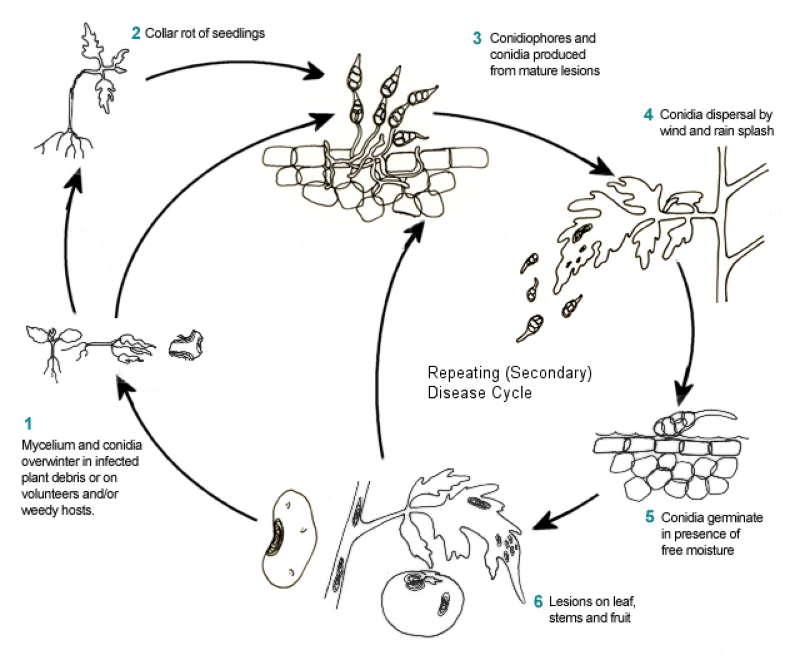

In [30]:
predicted_class = "Potato__Early_blight"
plt.figure(figsize = (10,10))
plt.axis("off")
print(Life_Cycle(predicted_class))

In [31]:
def Control_Management(predicted_class):
    if(predicted_class == "Potato__Early_blight"):
        control_management_early_blight = Image.open("C:\\Users\\SMART\\Downloads\\download early.png")
        print("Control and Management of Early Blight")
        plt.imshow(control_management_early_blight)
    elif(predicted_class == "Potato__Late_blight"):
        control_management_late_blight = Image.open("C:\\Users\\SMART\\Downloads\\download late.jpg")
        print("Control and Management of Late Blight")
        plt.imshow(control_management_late_blight)
    else:
        print("Potato is Healthy")

Control and Management of Early Blight
None


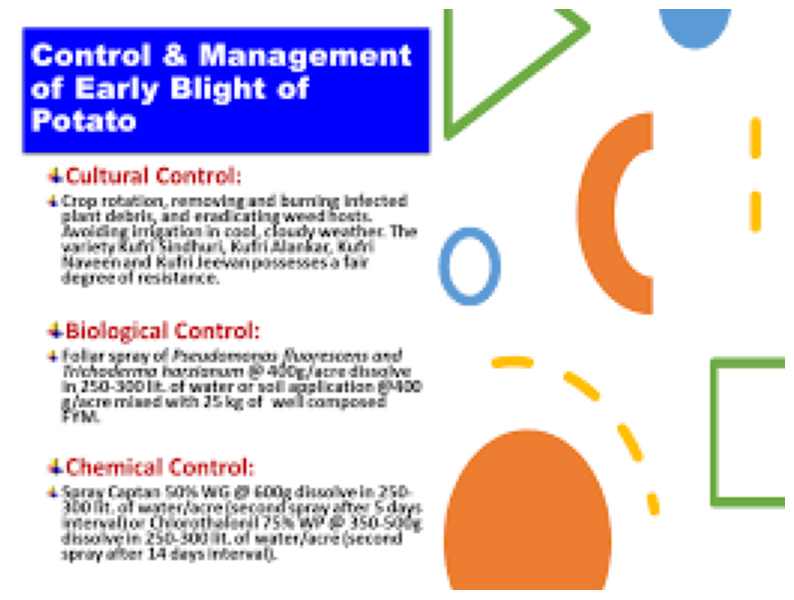

In [32]:
predicted_class = "Potato__Early_blight"
plt.figure(figsize = (10,10))
plt.axis("off")
print(Control_Management(predicted_class))